In [23]:
import os
import numpy as np
import scipy
from scipy import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import torch
import dolfin
from dolfin import *
from dolfin import *
from mshr import *
import mshr
import pickle

### Mesh Generation Method 1: Rectangle Mesh

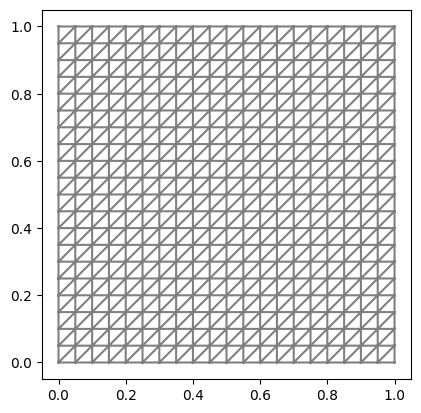

In [24]:
num_xy = 20
mesh = RectangleMesh (Point(0, 0), Point(1,1), num_xy, num_xy)

V = VectorElement('CG', triangle, 2)
Q = FiniteElement('CG', triangle, 1)
TH = V * Q
W = FunctionSpace(mesh, TH)

plot(mesh)

In [25]:
pos_u=W.sub(0).sub(0).collapse().tabulate_dof_coordinates()
pos_u1=W.sub(0).sub(0).collapse().tabulate_dof_coordinates()
pos_u2=W.sub(0).sub(1).collapse().tabulate_dof_coordinates()
pos_p=W.sub(1).collapse().tabulate_dof_coordinates()

pos_all=W.tabulate_dof_coordinates()
idx_u1=W.sub(0).sub(0).dofmap().dofs()
idx_u2=W.sub(0).sub(1).dofmap().dofs()
idx_p=W.sub(1).dofmap().dofs()

#### Small difference bewtween pos_all[idx_sol[i]] and pos_u/pos_p

In [26]:
print(np.abs(pos_all[idx_u1] - pos_u1).sum())
print(np.abs(pos_all[idx_u2] - pos_u2).sum())
print(np.abs(pos_all[idx_p] - pos_p).sum())
print(np.abs(pos_u1 - pos_u2).sum())

0.0
0.2500000000000001
0.20000000000000007
0.0


In [27]:
same_as_sets = set(map(tuple, pos_p)) == set(map(tuple, pos_all[idx_p]))
print("Arrays contain the same 2D elements (unordered):", same_as_sets)
same_as_vectors = np.array_equal(pos_p, pos_all[idx_p])
print("Arrays are identical:", same_as_vectors)

Arrays contain the same 2D elements (unordered): True
Arrays are identical: False


### Mesh Generation Method 2: generate_mesh 

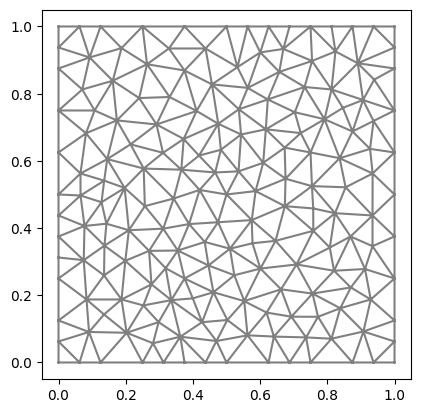

In [ ]:
num = 10
domain = Rectangle(Point(0,0), Point(1,1))
mesh = generate_mesh(domain, num)

V = VectorElement('CG', triangle, 2)
Q = FiniteElement('CG', triangle, 1)
TH = V * Q
W = FunctionSpace(mesh, TH)

plot(mesh)

In [29]:
pos_u=W.sub(0).sub(0).collapse().tabulate_dof_coordinates()
pos_u1=W.sub(0).sub(0).collapse().tabulate_dof_coordinates()
pos_u2=W.sub(0).sub(1).collapse().tabulate_dof_coordinates()
pos_p=W.sub(1).collapse().tabulate_dof_coordinates()

pos_all=W.tabulate_dof_coordinates()
idx_u1=W.sub(0).sub(0).dofmap().dofs()
idx_u2=W.sub(0).sub(1).dofmap().dofs()
idx_p=W.sub(1).dofmap().dofs()

#### Huge difference bewtween pos_all[idx_sol[i]] and pos_u/pos_p

In [30]:
print(np.abs(pos_all[idx_u1] - pos_u1).sum())
print(np.abs(pos_all[idx_u2] - pos_u2).sum())
print(np.abs(pos_all[idx_p] - pos_p).sum())
print(np.abs(pos_u1 - pos_u2).sum())

194.56259500162543
198.64576832098447
56.47238201094496
0.0


In [31]:
same_as_sets = set(map(tuple, pos_p)) == set(map(tuple, pos_all[idx_p]))
print("Arrays contain the same 2D elements (unordered):", same_as_sets)
same_as_vectors = np.array_equal(pos_p, pos_all[idx_p])
print("Arrays are identical:", same_as_vectors)

Arrays contain the same 2D elements (unordered): True
Arrays are identical: False


In [32]:
row_to_index_u1 = {tuple(row): i for i, row in enumerate(pos_u1)}
row_to_index_u2 = {tuple(row): i for i, row in enumerate(pos_u2)}
row_to_index_p = {tuple(row): i for i, row in enumerate(pos_p)}

perm_u1 = np.array([row_to_index_u1[tuple(row)] for row in pos_all[idx_u1]])
perm_u2 = np.array([row_to_index_u2[tuple(row)] for row in pos_all[idx_u2]])
perm_p = np.array([row_to_index_p[tuple(row)] for row in pos_all[idx_p]])

pos_u1_ordered = pos_u1[perm_u1]
pos_u2_ordered = pos_u2[perm_u2]
pos_p_ordered = pos_p[perm_p]
print("Are all DOFs ordered the same way now?")
print("u1", np.array_equal(pos_u1_ordered, pos_all[idx_u1]))
print("u2", np.array_equal(pos_u2_ordered, pos_all[idx_u2]))
print("p", np.array_equal(pos_p_ordered, pos_all[idx_p]))

Are all DOFs ordered the same way now?
u1 True
u2 True
p True


In [33]:
print(np.abs(pos_all[idx_u1] - pos_u1_ordered).sum())
print(np.abs(pos_all[idx_u2] - pos_u2_ordered).sum())
print(np.abs(pos_all[idx_p] - pos_p_ordered).sum())

0.0
0.0
0.0
